# **IRIS FLOWER CLASSIFICATION**

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

Download dataset from here: https://www.kaggle.com/datasets/saurabh00007/iriscsv

In [29]:
#task of Iris flower classification by importing the necessary Python libraries and the dataset that we need for this task:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data= pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
data.shape

(150, 6)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
#dropping the first column we dont need
data.drop(['Id'],axis=1,inplace=True)

In [36]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The target labels of this dataset are present in the species column, let’s have a quick look at the target labels:

In [37]:
print("Target Labels", data["Species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [38]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Now let’s plot the data using a scatter plot which will plot the iris species according to the sepal length and sepal width:

In [39]:
import plotly.express as px
fig = px.scatter(data, x="SepalWidthCm", y="SepalLengthCm", color="Species")
fig.show()

In [41]:
import plotly.express as px
fig = px.scatter(data, x="PetalWidthCm", y="PetalLengthCm", color="Species")
fig.show()

### **EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

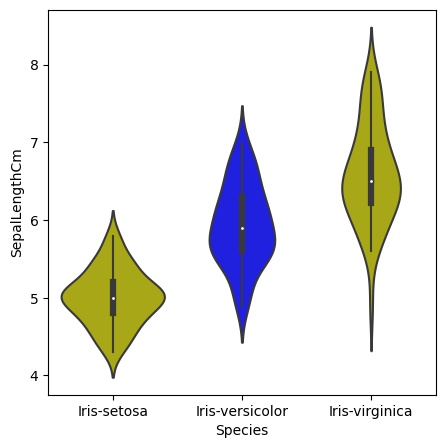

In [40]:
#Relationship between Species and SepalLengthCm
plt.figure(figsize=(5,5))
sn.violinplot(x='Species',y='SepalLengthCm',palette=["y", "b"],
            data=data)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

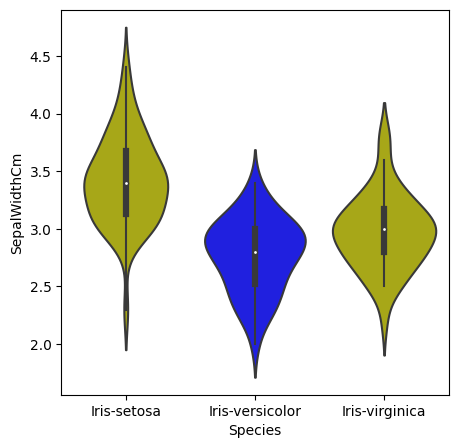

In [42]:
#Relationship between species and sepal width
plt.figure(figsize=(5,5))
sn.violinplot(data=data,x="Species", y="SepalWidthCm",palette=["y", "b"])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



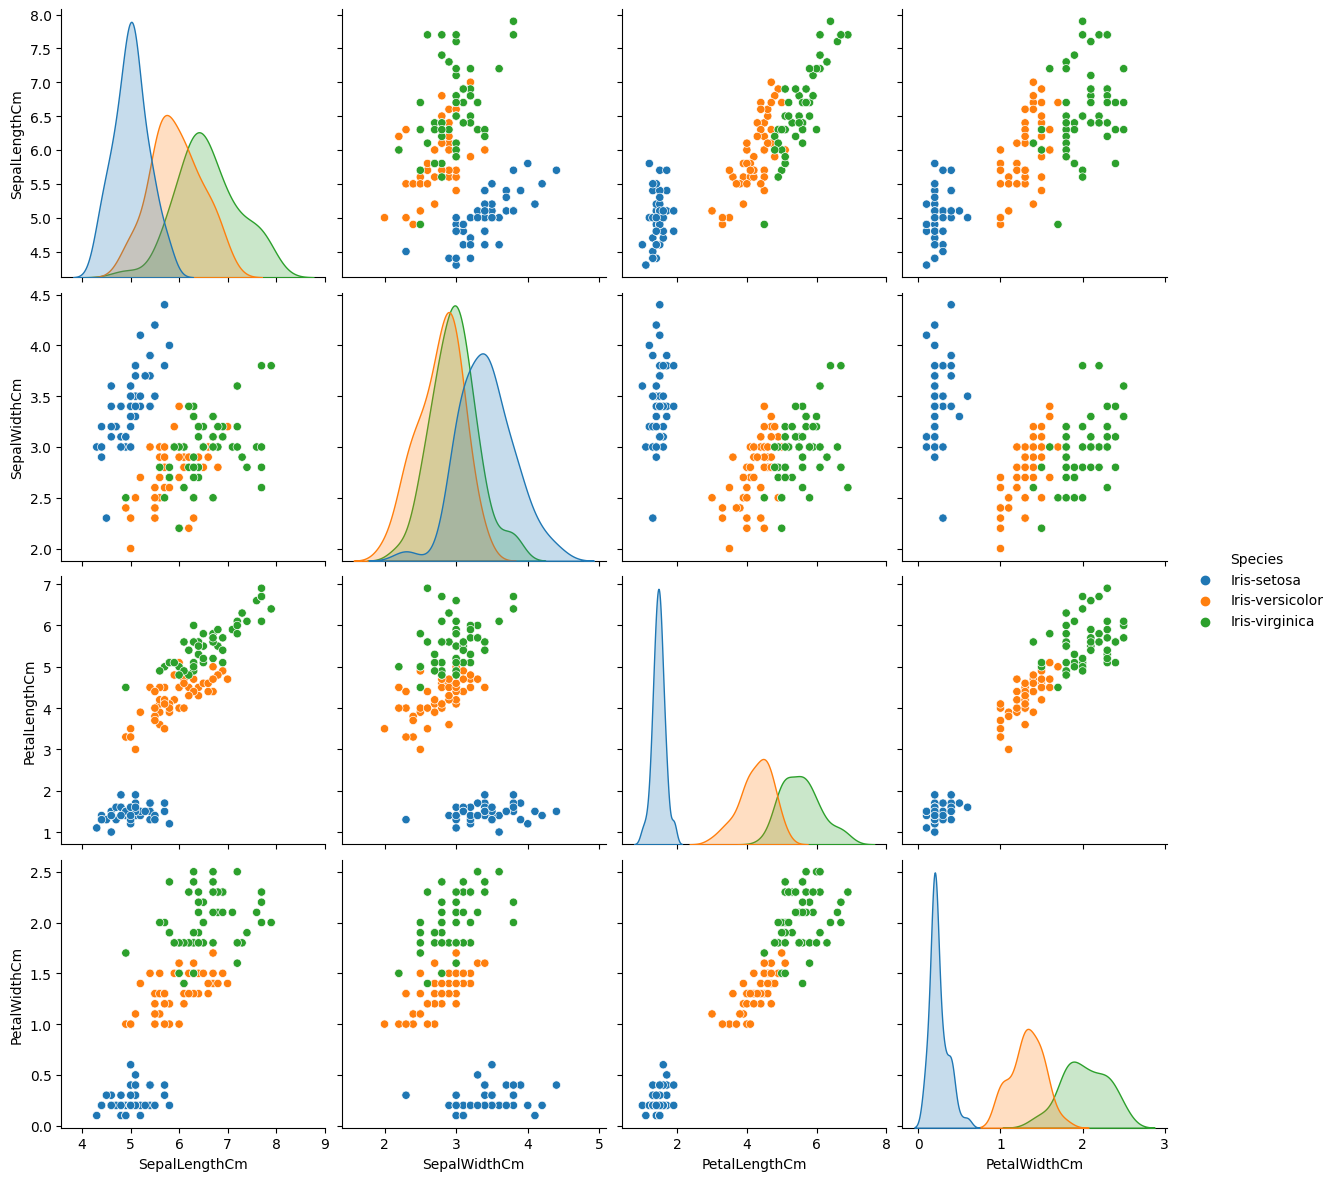

In [44]:
sn.pairplot(data, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

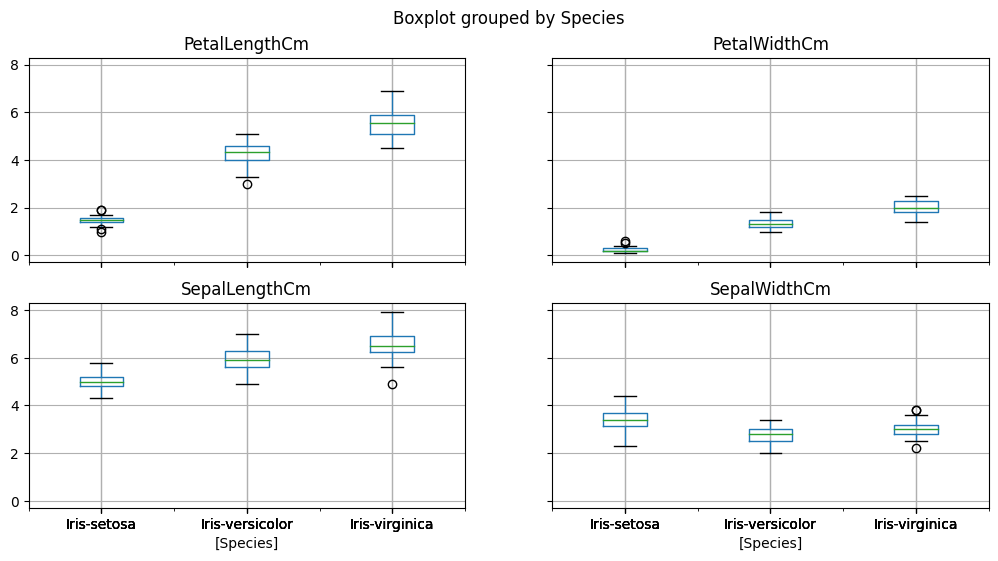

In [45]:
data.boxplot(by="Species", figsize=(12, 6))

<Axes: >

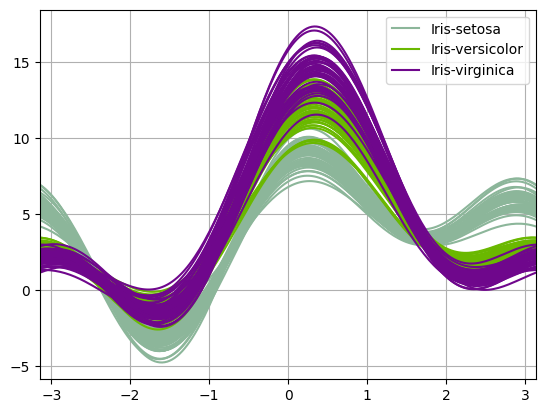

In [46]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(data, "Species")

<Figure size 1500x1500 with 0 Axes>

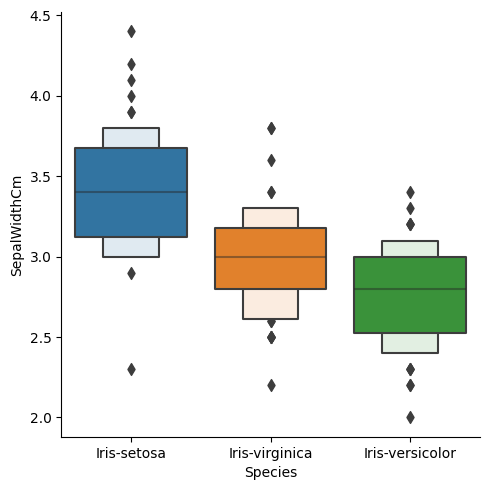

In [47]:
plt.figure(figsize=(15,15))
sn.catplot(x='Species',y='SepalWidthCm',data=data.sort_values('SepalWidthCm',ascending=False),kind='boxen')

## **Iris Classification Model**

Now let’s train a machine learning model for the task of classifying iris species. Here, I will first split the data into training and test sets, and then I will use the KNN classification algorithm to train the iris classification model:

In [49]:
x = data.drop("Species", axis=1)
y = data["Species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

